In [1]:
import numpy as np
import pandas as pd
import cv2
import skimage.io
import skimage.filters
import skimage.transform
import pyautogui
from matplotlib import pyplot as plt
from IPython.display import Image
from itertools import groupby
from colour import Color

In [2]:
filename = 'colorful.png'

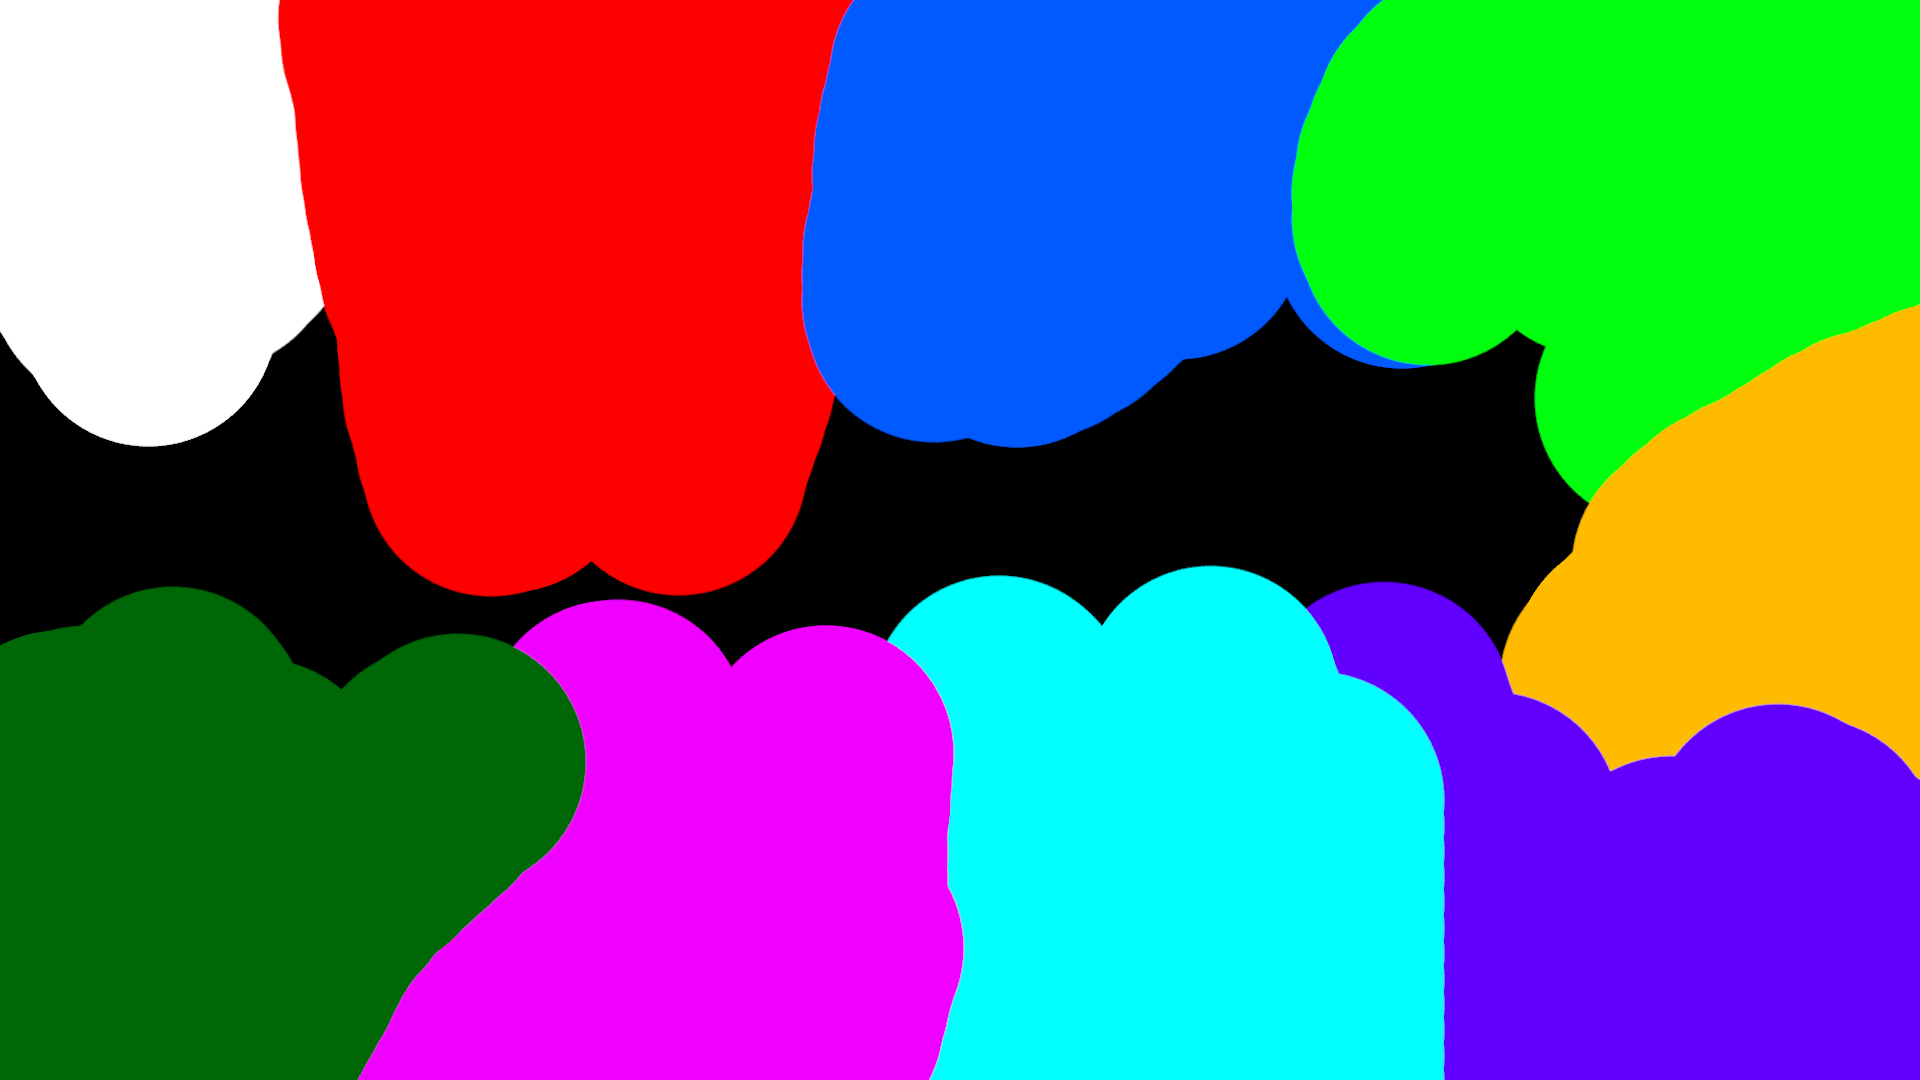

In [3]:
Image(filename) 

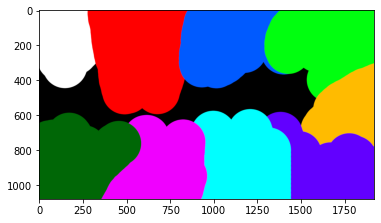

In [4]:
img = skimage.io.imread(filename)
plt.imshow(img)

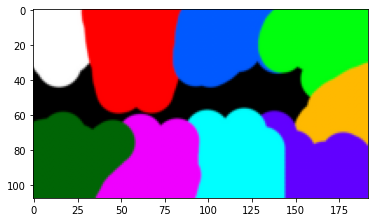

In [5]:
small = skimage.transform.resize(img, (108, 192), anti_aliasing=True)
plt.imshow(small)

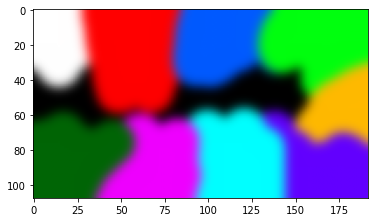

In [6]:
sigma = 3
blurred = skimage.filters.gaussian(small, sigma=sigma, truncate=3.5, multichannel=True)
# Using cv2.blur() method  
plt.imshow(blurred)

In [7]:
def get_borders(img, size, num_segments=5):
    bw = 5
    mask = np.zeros(img.shape[0:2], dtype=bool)
    mask[mask.ndim * (slice(bw, -bw),)] = True 

    top = img[0:bw, 0:img.shape[1]]
    right = np.transpose(img[bw:(img.shape[0] - bw), (img.shape[1] - bw):img.shape[1]], (1, 0, 2))
    bottom = np.flip(img[img.shape[0] - bw:img.shape[0], 0:img.shape[1]], 1)
    left = np.flip(np.transpose(img[bw:(img.shape[0] - bw), 0:bw], (1, 0, 2)), 1)
    final = np.hstack([top, right, bottom, left])
    
    gradient = skimage.transform.resize(final, (1, int(size/num_segments)), anti_aliasing=False, order=3)
    
    return gradient

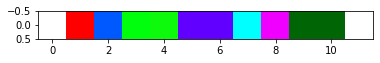

In [8]:
segments = get_borders(small, 60)
plt.imshow(segments)

In [9]:
def rgb2int(rgb):
    return (int(rgb[0]*255) << 16) + (int(rgb[1]*255) << 8) + (int(rgb[2]*255) << 0)

def int2rgb(num):
    return (((num >> 16) & 0xFF)/255, ((num >> 8) & 0xFF)/255, ((num >> 0) & 0xFF)/255)

# Communicate with Device

In [10]:
import time

In [11]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

In [12]:
import simpap

In [13]:
c = simpap.Blueled('/dev/ttyUSB0')

In [14]:
num_leds = 120
c.set_leds(num_leds)

fmt: <HbI; data: [32, 1, 120]
-> b'aa'
[DEBUG] Waiting for b'bb'
[DEBUG] Good: Received b'bb'
-> b'7e20000178000000dff27e'
[DEBUG] Waiting for b'bb'
[DEBUG] Good: Received b'bb'


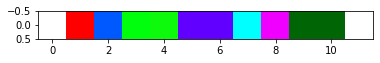

In [15]:
segments = get_borders(small, 60)
plt.imshow(segments)
colors = [rgb2int(c) for c in segments[0]]

In [17]:
def set_segments(colors):
    c.segments(*colors)

In [19]:
set_segments(colors)

fmt: <HbIIIIIIIIIIII; data: [82, 12, 16777215, 16711680, 23039, 65293, 981517, 6357246, 6357247, 65535, 15663359, 25861, 25861, 16777215]
-> b'aa'
[DEBUG] Waiting for b'bb'
[DEBUG] Good: Received b'bb'
-> b'7e52000cffffff000000ff00ff5900000dff00000dfa0e00fe006100ff006100ffff0000ff00ef000565000005650000ffffff000b8c7e'
[DEBUG] Waiting for b'bb'
[DEBUG] Good: Received b'bb'


In [28]:
for i in range(10):
    set_segments(colors)
    time.sleep(0.2)
    set_segments(colors[::-1])
    time.sleep(0.2)

fmt: <HbIIIIIIIIIIII; data: [82, 12, 16777215, 16711680, 23039, 65293, 981517, 6357246, 6357247, 65535, 15663359, 25861, 25861, 16777215]
-> b'aa'


NameError: name 'cmd' is not defined

In [27]:
c.stop()